In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten

In [2]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    'blood_cells',
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    'blood_cells',
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    subset='validation'
)

Found 24 images belonging to 5 classes.
Found 4 images belonging to 5 classes.


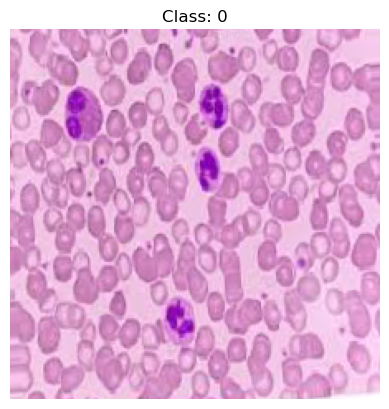

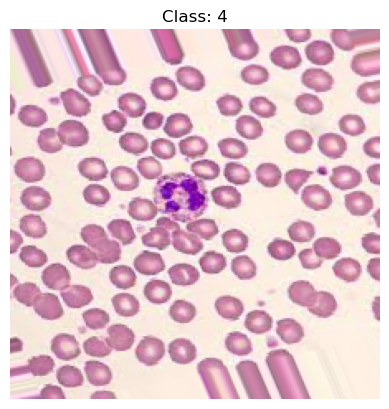

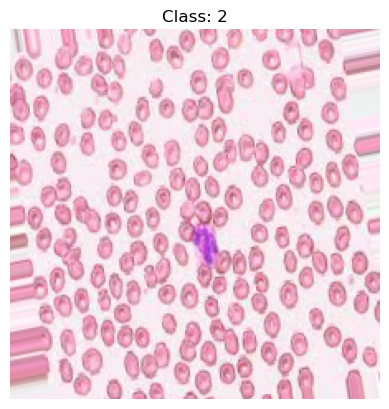

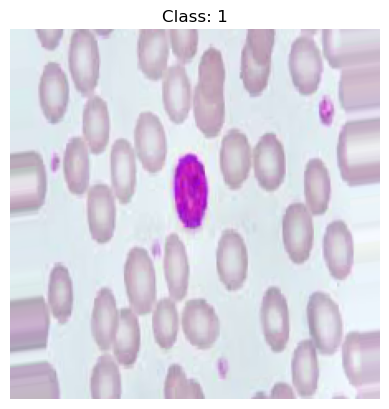

In [3]:
images, labels = next(train_data)

for i in range(4):
    plt.imshow(images[i])
    plt.axis('off')
    plt.title("Class: " + str(np.argmax(labels[i])))
    plt.show()

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    'blood_cells',
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    'blood_cells',
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    subset='validation'
)

Found 24 images belonging to 5 classes.
Found 4 images belonging to 5 classes.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16

base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224,224,3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,926,725 (68.39 MB)

 Trainable params: 3,212,037 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [6]:
from tensorflow.keras.applications import VGG16
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=3  # You can increase this if you have more data
)

C:\Users\alish\anaconda3\anaconda33\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 745ms/step - accuracy: 0.1250 - loss: 4.7772 - val_accuracy: 0.2500 - val_loss: 2.4396
Epoch 2/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 566ms/step - accuracy: 0.5052 - loss: 2.2803 - val_accuracy: 0.2500 - val_loss: 3.1992
Epoch 3/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 599ms/step - accuracy: 0.3281 - loss: 2.2402 - val_accuracy: 0.0000e+00 - val_loss: 2.9913


In [7]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224,224,3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,926,725 (68.39 MB)

 Trainable params: 3,212,037 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [8]:
model.save("Blood_Cell.h5")
print("Model saved as Blood_Cell.h5")

Model saved as Blood_Cell.h5


In [9]:
!pip install tensorflow

In [10]:
model.save("Blood_Cell.h5")

In [11]:
model.save("Blood_Cell.h5")
print("Model saved successfully!")

Model saved successfully!


In [12]:
import cv2

In [13]:
!pip install opencv-python

In [14]:
import cv2